# Titanic Survival Prediction

In [87]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Load Dataset

In [88]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data preprocessing and visualization

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [90]:
df.shape

(418, 12)

In [91]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [92]:
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Fare'].fillna(df['Fare'].mean(), inplace = True)
df['Cabin'].fillna("Unknown", inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Unknown,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Unknown,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Unknown,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Unknown,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Unknown,S


In [93]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [94]:
df.duplicated().sum()

0

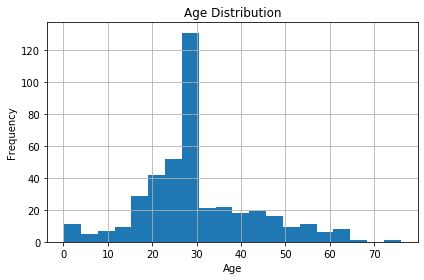

In [95]:
# Plotting a histogram for Age Distribution
plt.hist(df['Age'], bins=20)  
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)  
plt.tight_layout()
plt.show()

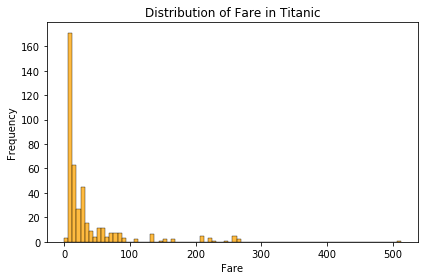

In [96]:
# Plotting histogram for Distribution of Fare in Titanic
sns.histplot(data=df, x='Fare', color='orange')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare in Titanic')
plt.tight_layout()
plt.show()

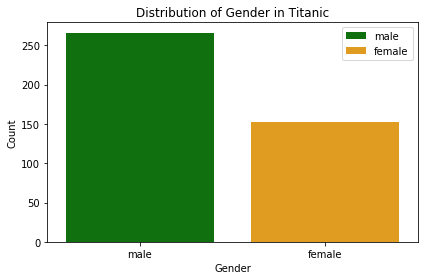

In [97]:
# Plotting graph for Distribution of Sex in Titanic
gender_counts = df['Sex'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, hue=gender_counts.index, palette=["green", "orange"], dodge=False)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender in Titanic')
plt.tight_layout()
plt.show()

In [98]:
df.groupby('Sex')[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,1.0,2.144737,30.272400,0.565789,0.598684,49.747699
male,0.0,2.334586,30.272699,0.379699,0.274436,27.558326


In [99]:
df.groupby('Embarked')[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].mean()

,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,
C,1.794118,33.862273,0.421569,0.382353,66.259765
Q,2.869565,29.816134,0.195652,0.021739,10.957700
S,2.340741,28.994255,0.500000,0.459259,28.257832


In [100]:
df['Sex_encoded'] = df['Sex'].replace({'male' : 0 , 'female' : 1})

In [101]:
X = df[['Age', 'Pclass', 'Sex_encoded']]
y = df['Survived']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Random Froest Model training

In [103]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [104]:
# Evaluate the rfc model
accuracy = accuracy_score(y_test, rfc_pred)
confusion_mat = confusion_matrix(y_test, rfc_pred)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



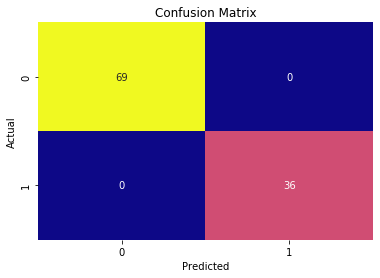

In [105]:
# Visualize the confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='plasma', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Gradient Boosting model training

In [106]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)

In [107]:
# Evaluate the gbc model
accuracy = accuracy_score(y_test, gbc_pred)
confusion_mat = confusion_matrix(y_test, gbc_pred)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



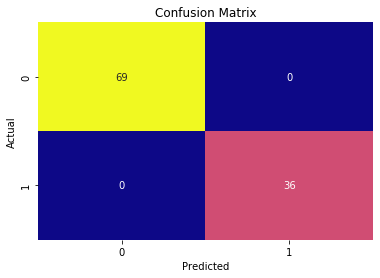

In [108]:
# Visualize the confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='plasma', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()